In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from config import methods, groups, res_folder, plot_folder

In [3]:
res_path = str(res_folder)

In [4]:
groups

{'CA': ['CA-F', 'CA-S'], 'FR': ['FR-G', 'FR-I'], 'DENY': ['DE-G', 'NY-Q']}

In [5]:
k = [k for k,v in groups.items()]
import itertools
all_perms = list(itertools.permutations(k, 2))
base_model_trained_ons = [i[0] for i in all_perms]
active_learning_ds = [i[1] for i in all_perms]

print(all_perms)

[('CA', 'FR'), ('CA', 'DENY'), ('FR', 'CA'), ('FR', 'DENY'), ('DENY', 'CA'), ('DENY', 'FR')]


# Get data

In [6]:
#metric = "precisions"
#metric = "recalls"
metric = "dataset_ious"
metrics=["precisions", "recalls","dataset_ious"]

In [7]:
res_jointlearn = dict()
res_jointlearn_c = dict()
res_jointlearn_p = dict()
res_jointlearn_c_p = dict()
seed=41
seeds=[41,42,43]

metric="dataset_ious"
for seed in seeds:
    for loc,loc2 in np.array(all_perms):
        for m in ['RandomSampling','EntropySampling']:
            res_jointlearn[seed,loc,loc2, m] = np.load(f"{res_path}/all/jointlearn/{loc}/{loc2}/16_{seed}/{m}/result.npz")[metric]
            res_jointlearn_c[seed,loc,loc2, m] = np.load(f"{res_path}/controlled/jointlearn/{loc}/{loc2}/16_{seed}/{m}/result.npz")[metric]
            if m == "RandomSampling":
                res_jointlearn_p[seed,loc,loc2, m] = np.load(f"{res_path}/all/jointlearn/{loc}/{loc2}/16_{seed}/{m}/results_perfect_2.npz")[metric]
                res_jointlearn_c_p[seed,loc,loc2, m] = np.load(f"{res_path}/controlled/jointlearn/{loc}/{loc2}/16_{seed}/{m}/results_perfect_2.npz")[metric]


In [8]:
res_fine_tune = dict()
res_fine_tune_c = dict()
res_fine_tune_p = dict()
res_fine_tune_c_p = dict()
seed=41
seeds=[41,42,43]
for seed in seeds:
    for loc,loc2 in np.array(all_perms):
        for m in ['RandomSampling','EntropySampling']:
            res_fine_tune[seed,loc,loc2, m] = np.load(f"{res_path}/all/finetune/{loc}/{loc2}/16_{seed}/{m}/result.npz")[metric]
            res_fine_tune_c[seed,loc,loc2, m] = np.load(f"{res_path}/controlled/finetune/{loc}/{loc2}/16_{seed}/{m}/result.npz")[metric]
            
            if m == "RandomSampling":
                res_fine_tune_p[seed,loc,loc2, m] = np.load(f"{res_path}/all/finetune/{loc}/{loc2}/16_{seed}/{m}/results_perfect_2.npz")[metric]
                res_fine_tune_c_p[seed,loc,loc2, m] = np.load(f"{res_path}/controlled/finetune/{loc}/{loc2}/16_{seed}/{m}/results_perfect_2.npz")[metric]


### Helper plot functions

In [9]:
import matplotlib.transforms as transforms

import matplotlib.image as mpimg
import glob
from io import BytesIO

from config import img_folder_positives

def get_img_loc(loc_name="CA", img_no=3):
    image_data = BytesIO()
    fig, axs = plt.subplots(img_no,img_no)
    locs = groups[loc_name]
    imgs = [glob.glob(f'{img_folder_positives}/{loc_name}/tiles/img/*.png') for loc_name in locs]

    imgs = [item for sublist in imgs for item in sublist]
    np.random.shuffle(imgs)
    idx=0
    for ax_r in axs:
        for ax in ax_r:
            img_p = imgs[idx] 
            img = mpimg.imread(img_p)
            ax.imshow(img)
            idx=idx+1
            ax.set_xticks([])
            ax.set_yticks([])
    fig.subplots_adjust(wspace=-.25, hspace=.1) #-.65
    plt.savefig(image_data, format='png',transparent=True, bbox_inches="tight");
    image_data.seek(0)
    img = mpimg.imread(image_data)
    plt.close()
    
    return img

def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=10,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )



        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            trans = transforms.blended_transform_factory(ax.transData, \
                                             ax.transAxes)
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(-.5, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=trans,
                #xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

In [10]:
def get_img_loc(loc_name="CA", img_no=3):
    image_data = BytesIO()
    fig, axs = plt.subplots(img_no,img_no)
    locs = groups[loc_name]
    imgs = [glob.glob(f'{img_folder_positives}/{loc_name}/tiles/img/*.png') for loc_name in locs]
    imgs = [item for sublist in imgs for item in sublist]
    np.random.shuffle(imgs)
    idx=0
    for ax_r in axs:
        for ax in ax_r:
            img_p = imgs[idx] 
            img = mpimg.imread(img_p)
            ax.imshow(img)
            idx=idx+1
            ax.set_xticks([])
            ax.set_yticks([])
    fig.subplots_adjust(wspace=-.4, hspace=.05) #-.65
    plt.savefig(image_data, format='png',transparent=True, bbox_inches="tight");
    image_data.seek(0)
    img = mpimg.imread(image_data)
    plt.close()
    return img

In [11]:
m = "RandomSampling"
m = "EntropySampling"

a = {(*k,"c"):v for k,v in res_fine_tune_c.items() if k[3]==m}
df1 = pd.DataFrame.from_dict(a).T

a = {(*k,"a"):v for k,v in res_fine_tune.items() if k[3]==m}
df2 = pd.DataFrame.from_dict(a).T

In [12]:
#************************************************************** Main function **************************************************************


def make_plot_up(dict1,dict2):
    dict1,dict1_p = dict1
    dict2,dict2_p = dict2
    
    fig_dict={('CA', 'FR'):(0,1), ('CA', 'DENY'):(0,2), ('FR', 'CA'):(1,0), ('FR', 'DENY'):(1,2), ('DENY', 'CA'):(2,0), ('DENY', 'FR'):(2,1)}
    f_w = 3
    gridspec = dict(hspace=0.0, width_ratios=[f_w, f_w, f_w, .75, f_w, f_w, f_w])

    fig, axs = plt.subplots(3,7, gridspec_kw=gridspec, figsize=(13,5))

    def make_plot(data_dict, data_dict_p, axs, add_legend=True):
        for loc,loc2 in all_perms:
            df = pd.DataFrame.from_dict(data_dict).T
            df = df.loc[:,loc,loc2]
            dfs = [df.loc[seed,:] for seed in seeds]
            df_min = df.reset_index(level=1).groupby(["level_1"]).min()
            df_median = df.reset_index(level=1).groupby(["level_1"]).median()
            df_max = df.reset_index(level=1).groupby(["level_1"]).max()
            for m in ['RandomSampling','EntropySampling']:
                x = (df.columns.astype(float)+1)*16
                y_min = df_min.loc[m].values
                y_median = df_median.loc[m].values
                y_max = df_max.loc[m].values
                axs[fig_dict[(loc,loc2)]].fill_between(x, y_min, y_max, alpha = 0.5) # , color = 'blue'
                axs[fig_dict[(loc,loc2)]].plot(x, y_median, label=m) # , color = 'blue'
                
            #y_1 = [data_dict_p[(s, loc, loc2, "EntropySampling")] for s in seeds]
            y_2 = [data_dict_p[(s, loc, loc2, "RandomSampling")] for s in seeds]
            y_ = np.median(y_2)
            #y_ = np.max([y_1,y_2])
            axs[fig_dict[(loc,loc2)]].axhline(y_, label="all data", color="black", linestyle="--") # , color = 'blue'
            #axs[fig_dict[(loc,loc2)]].axhline(np.max(y_2), color="red") # , color = 'blue'
            #axs[fig_dict[(loc,loc2)]].axhline(np.min(y_2), color="blue") # , color = 'blue'

            axs[fig_dict[(loc,loc2)]].set_title("")
            axs[fig_dict[(loc,loc2)]].spines['top'].set_visible(False)
            axs[fig_dict[(loc,loc2)]].spines['right'].set_visible(False)

        locs = ["CA","FR","DENY"]
        if add_legend:
            axs[0,2].legend(bbox_to_anchor=(.35, .925))

        font_kwargs = dict(fontfamily="monospace", fontweight="bold", fontsize=26)

        for idx in range(3):
            loc = locs[idx]
            img = get_img_loc(loc,img_no=2)
            axs[idx,idx].imshow(img)
            axs[idx,idx].set_xticks([])
            axs[idx,idx].set_yticks([])
            axs[idx,idx].margins(x=0)
            axs[idx,idx].margins(y=0)
            axs[idx,idx].annotate(loc, xy=(193,193), size=29, va="center",  fontweight="bold", ha="center",color="white")
            ax = axs[idx,idx]
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            
        for ax in [axs[1,0],axs[0,1],axs[0,2],axs[1,2]]:
            ax.spines['bottom'].set_visible(False)

        axs[0,0].annotate("FROM", (0,0), xytext=(-150,350), size=22, color="black",  fontweight="bold", rotation=90,  bbox=dict(boxstyle="round", fc="w"))
        axs[0,0].annotate("TO", (0,0),  xytext=(50,-100), size=22, color="black",  fontweight="bold", bbox=dict(boxstyle="round", fc="w"))

    make_plot(data_dict=dict1, data_dict_p=dict1_p, axs=axs[:,0:3], add_legend=False)
    make_plot(data_dict=dict2, data_dict_p=dict2_p, axs=axs[:,4:7])

    for ax in [axs[1,0], axs[2,0], axs[1,4], axs[2,4]]:
        ax.set_ylabel("test IOU", labelpad=-.5)

    for ax in [axs[2,0], axs[2,1],axs[2,3],axs[2,4],axs[2,5]]:
        ax.set_xlabel("# images", labelpad=-.5)

    axs[0,1].set_title("Fine-tuning", size=22, color="black",  fontweight="bold")
    axs[0,5].set_title("Joint-Learning", size=22, color="black",  fontweight="bold")

        
    [ax.set_visible(False) for ax in axs[:,3]]

    return fig


In [13]:
all_ca_fr = {("CA","FR"): 72241,
             ("CA","DENY"): 42861,
             ("FR","CA"): 72241,
             ("FR","DENY"): 56595,
             ("DENY","CA"): 42861,
             ("DENY","FR"): 56595
}

all_ca_fr = {("CA","FR"): 72241,
             ("CA","DENY"): 42861,
             ("FR","CA"): 72241,
             ("FR","DENY"): 56595,
             ("DENY","CA"): 42861,
             ("DENY","FR"): 56595
}

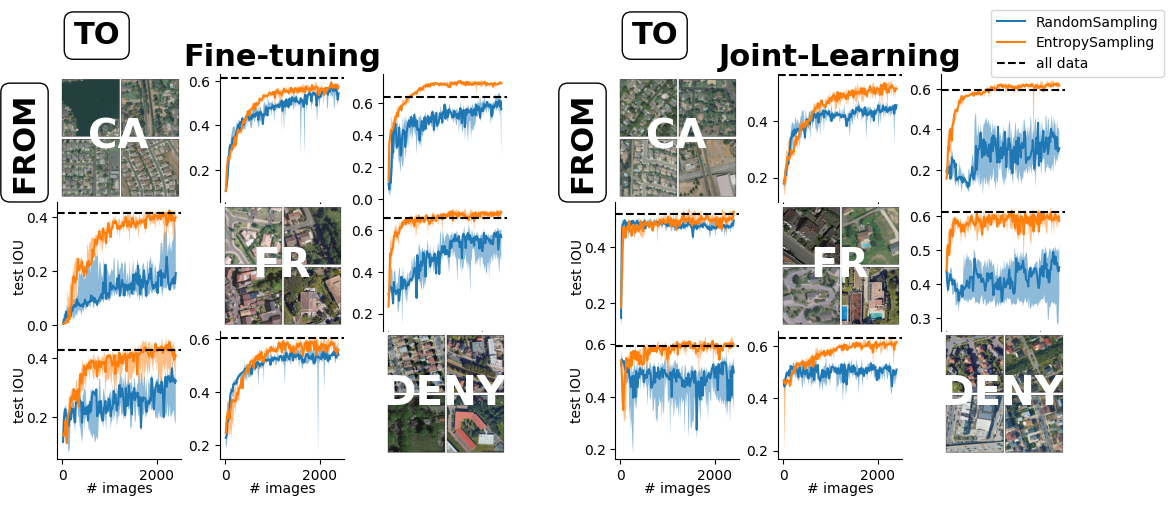

In [14]:
fig = make_plot_up(dict1=(res_fine_tune, res_fine_tune_p), dict2=(res_jointlearn, res_jointlearn_p))
fig.subplots_adjust(wspace=.35, hspace=.15)
plt.savefig(f"{plot_folder}/benchmark_all_pub.pdf",bbox_inches="tight")

# Controlled

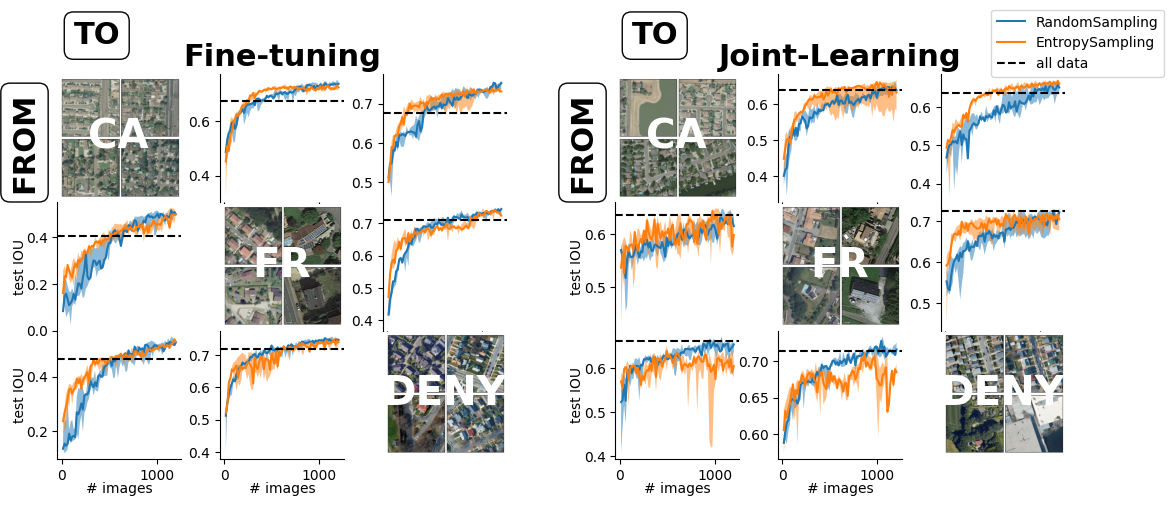

In [15]:
fig = make_plot_up(dict1=(res_fine_tune_c, res_fine_tune_c_p), dict2=(res_jointlearn_c, res_jointlearn_c_p))
fig.subplots_adjust(wspace=.35, hspace=.15)
plt.savefig(f"{plot_folder}/benchmark_con_pub.pdf",bbox_inches="tight")